In [4]:
#all dependencies that will be used or could be used
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plyt

In [5]:
data = pd.read_csv('data/train.csv')
data2 = pd.read_csv('data/Mendeley/Dataset_5971.csv')

CLEAN INDIVIDUAL DATASET TO MERGE

In [6]:
data

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [7]:
data['label'].unique()

array([0, 1], dtype=int64)

In [8]:
data['label'] = data['label'].replace(0, 'ham')
data['label'] = data['label'].replace(1, 'Smishing')

In [9]:
data = data.rename({'sms': 'LABEL', 'label': 'TEXT'}, axis='columns')

In [10]:
data['TEXT'], data['LABEL'] = data['LABEL'], data['TEXT']

In [11]:
data['TEXT'].str.strip()

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                 Will ü b going to esplanade fr home?
5571    Pity, * was in mood for that. So...any other s...
5572    The guy did some bitching but I acted like i'd...
5573                           Rofl. Its true to its name
Name: TEXT, Length: 5574, dtype: object

In [12]:
data.head()

,LABEL,TEXT
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...\n
2,Smishing,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
import re
def remove_extra_white_space_and_lines(text):
  """Removes extra white space and lines from a string.

  Args:
    text: A string.

  Returns:
    A string with extra white space and lines removed.
  """

  # Remove extra white space.
  text = re.sub(r'\s+', ' ', text)

  # Remove extra lines.
  text = re.sub(r'\n+', '\n', text)

  return text

In [14]:
data['TEXT'] = data['TEXT'].apply(remove_extra_white_space_and_lines)
data['TEXT'] = data['TEXT'].str.strip()

In [15]:
data.count()

LABEL    5574
TEXT     5574
dtype: int64

In [16]:
smishing = data[data['LABEL'] == 'Smishing'].count()
smishing

LABEL    747
TEXT     747
dtype: int64

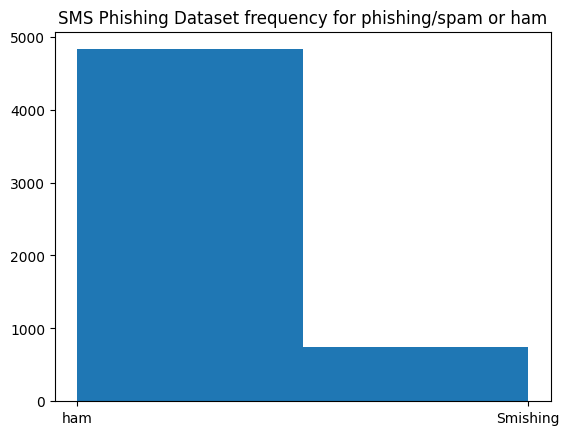

In [17]:
plyt.hist(data['LABEL'], bins=2)
plyt.title("SMS Phishing Dataset frequency for phishing/spam or ham")
plyt.show()

In [18]:
data2

,LABEL,TEXT,URL,EMAIL,PHONE
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,No,No,No
1,ham,What's up? Do you want me to come online? If y...,No,No,No
2,ham,So u workin overtime nigpun?,No,No,No
3,ham,"Also sir, i sent you an email about how to log...",No,No,No
4,Smishing,Please Stay At Home. To encourage the notion o...,No,No,No
...,...,...,...,...,...
5966,ham,:( but your not here....,No,No,No
5967,ham,Becoz its &lt;#&gt; jan whn al the post ofic...,No,No,No
5968,ham,Its a valentine game. . . send dis msg to all ...,No,No,No
5969,ham,We r outside already.,No,No,No


In [19]:
data2['TEXT'] = data2['TEXT'].apply(remove_extra_white_space_and_lines)
data2['TEXT'] = data2['TEXT'].str.strip()

In [20]:
data2['LABEL'].unique()

array(['ham', 'Smishing', 'spam', 'Spam', 'smishing'], dtype=object)

In [21]:
data2['LABEL'] = data2['LABEL'].replace('smishing', 'Smishing')
data2['LABEL'] = data2['LABEL'].replace('spam', 'Smishing')
data2['LABEL'] = data2['LABEL'].replace('Spam', 'Smishing')

In [22]:
data2['LABEL'].unique()

array(['ham', 'Smishing'], dtype=object)

In [23]:
data2 = data2.drop(columns=['URL', 'EMAIL', 'PHONE'])

In [24]:
smishing2 = data2[data2['LABEL']=='Smishing'].count()
smishing2

LABEL    1127
TEXT     1127
dtype: int64

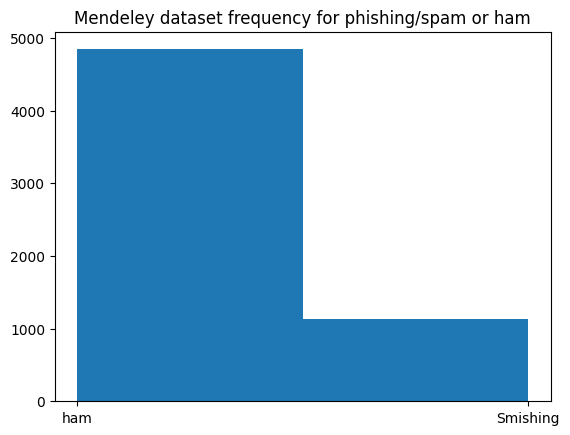

In [25]:
plyt.hist(data2['LABEL'], bins=2)
plyt.title("Mendeley dataset frequency for phishing/spam or ham")
plyt.show()

MERGE DATASETS

In [26]:
df = pd.concat([data, data2], ignore_index=True)
df = df.drop_duplicates()

In [27]:
df

,LABEL,TEXT
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,Smishing,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
11497,Smishing,You have won a Nokia 7250i. This is what you g...
11519,Smishing,Records indicate you were involved in an accid...
11526,ham,"As I entered my cabin my PA said, '' Happy B'd..."
11533,ham,Yes :)it is completely in out of form:)


In [28]:
df.to_csv('data/merged.csv', index=False)

CLEAN/PREPROCESS MERGED DATASET

In [56]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [30]:
missing = df.isnull()

In [31]:
missing_row = df.loc[missing.any(axis=1)]
missing_row

,LABEL,TEXT


In [32]:
#Changes all text input to lower case
def lower_case(text):
    return text.lower()

In [33]:
#Testing lower case function
str1 = "HELLO WORLD"
print(str1)
print(lower_case(str1))

HELLO WORLD
hello world


In [34]:
#Remove any unwated punctuations or special strings in the message 
def remove_punctuation(text):
    text = re.sub(r"[^\w\s]", "", text)
    return text

In [35]:
#Testing punctuation function
str1 = "HELLO!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ WORLD"
print(str1)
print(remove_punctuation(str1))

HELLO!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ WORLD
HELLO_ WORLD


In [54]:
#Remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

In [55]:
#Testing stop words function
str1 = "I am going to the store to buy some milk."
print(str1)
print(remove_stopwords(str1))

I am going to the store to buy some milk.
I going store buy milk.


In [60]:
#Stemming
def stem(text):
    text = remove_stopwords(lower_case(remove_punctuation(text)))
    #ps = PorterStemmer()
    #text = " ".join([ps.stem(word) for word in text.split()])
    return text

In [61]:
#Testing stemming function
str1 = "HELLO!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ WORLD, I am going to the store to buy some milk."
print(str1)
print(stem(str1))

HELLO!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ WORLD, I am going to the store to buy some milk.
hello_ world going store buy milk


In [40]:
#Encode word
def encode_text():
    return 0